In [1]:
import numpy as np
import numpy as np 
import pandas as pd
from rdkit import Chem
from rdkit.Chem import MACCSkeys
from rdkit.Chem import rdMolDescriptors
from rdkit import DataStructs
from ast import literal_eval
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn import svm
from sklearn import metrics
from sklearn.svm import SVC
import pickle
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

In [2]:
new_df = pd.read_csv('../Data/167_features.csv')
new_df = new_df.loc[:, ~new_df.columns.str.contains('^Unnamed')]

In [3]:
x_list = list(new_df)
x_list = x_list[:-1]
# x_list

In [4]:
X = np.asarray(new_df[x_list])
Y = np.asarray(new_df['general_syntax#'])

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, shuffle= True)

In [5]:
lineReg = LinearRegression()
lineReg.fit(X_train, y_train)
print('Score: ', lineReg.score(X_test, y_test))
# print('Weights: ', lineReg.coef_)

Score:  0.2778164135050506


In [6]:
svm_initial_model = pickle.load(open('../models/svm_initial_model.sav', 'rb'))
y_pred = svm_initial_model.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5667759331711959


In [7]:
svc_model = pickle.load(open('../models/polynomial_kernel_svc_model.sav', 'rb'))
y_pred = svc_model.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.79137147086814


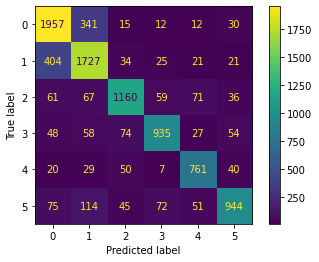

In [8]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                            display_labels=svc_model.classes_)
disp.plot()

In [9]:
# target_names = [
#             'the risk or severity of adverse effects can be increased when drug1 is combined with drug2.', 
#             'the risk or severity of adverse effects can be increased when drug2 is combined with drug1.', 
#             'the serum concentration of drug1 can be increased when it is combined with drug2.', 
#             'the serum concentration of drug2 can be increased when it is combined with drug1.',
#             'the metabolism of drug1 can be decreased when combined with drug2.',
#             'the metabolism of drug2 can be decreased when combined with drug1.'
#         ]
target_names = ['0', '1', '2', '3', '4', '5']  

In [10]:
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

           0       0.76      0.83      0.79      2367
           1       0.74      0.77      0.76      2232
           2       0.84      0.80      0.82      1454
           3       0.84      0.78      0.81      1196
           4       0.81      0.84      0.82       907
           5       0.84      0.73      0.78      1301

    accuracy                           0.79      9457
   macro avg       0.81      0.79      0.80      9457
weighted avg       0.79      0.79      0.79      9457



In [11]:
import matplotlib.pyplot as plt

In [12]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(svc_model)

NameError: name 'y' is not defined